In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import numpy as np
import math
%matplotlib inline

sys.path.append('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/results/paper')

## Virus Abundance Plot

In [2]:
df = pd.read_csv('virus_abundance_data.csv', index_col=0)
df.head()

batch  Human herpesvirus 6B  \
03C23190 - LCL - AU1157  batch_01009                   0.0   
03C23194 - WB - AU1157   batch_01009                   0.0   
03C23208 - WB - AU1157   batch_01009                   0.0   
03C23209 - WB - AU1157   batch_01009                   0.0   
03C23211 - WB - AU1157   batch_01009                   0.0   

                         Enterobacteria phage phiX174  Human parvovirus B19  \
03C23190 - LCL - AU1157                     1085585.0                   NaN   
03C23194 - WB - AU1157                      1064727.0                   NaN   
03C23208 - WB - AU1157                      1090048.0                   NaN   
03C23209 - WB - AU1157                      1057893.0                   NaN   
03C23211 - WB - AU1157                      1231973.0                   NaN   

                         Human herpesvirus 7  \
03C23190 - LCL - AU1157                  0.0   
03C23194 - WB - AU1157                   0.0   
03C23208 - WB - AU1157                   0.0   
03C23209 - WB - AU1157                   1.0   
03C23211 - WB - AU1157                   1.0   

                         Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102  \
03C23190 - LCL - AU1157                                                NaN                                
03C23194 - WB - AU1157                                                 NaN                                
03C23208 - WB - AU1157                                                 NaN                                
03C23209 - WB - AU1157                                                 NaN                                
03C23211 - WB - AU1157                                                 NaN                                

                         Human herpesvirus 6A  \
03C23190 - LCL - AU1157                   0.0   
03C23194 - WB - AU1157                    0.0   
03C23208 - WB - AU1157                    0.0   
03C23209 - WB - AU1157                    0.0   
03C23211 - WB - AU1157                    0.0   

                         Squirrel monkey retrovirus - HLB  \
03C23190 - LCL - AU1157                               NaN   
03C23194 - WB - AU1157                                NaN   
03C23208 - WB - AU1157                                NaN   
03C23209 - WB - AU1157                                NaN   
03C23211 - WB - AU1157                                NaN   

                         Enterobacteria phage lambda  \
03C23190 - LCL - AU1157                          9.0   
03C23194 - WB - AU1157                           5.0   
03C23208 - WB - AU1157                           6.0   
03C23209 - WB - AU1157                           9.0   
03C23211 - WB - AU1157                           5.0   

                         Moloney murine leukemia virus  ...  \
03C23190 - LCL - AU1157                            NaN  ...   
03C23194 - WB - AU1157                             NaN  ...   
03C23208 - WB - AU1157                             NaN  ...   
03C23209 - WB - AU1157                             NaN  ...   
03C23211 - WB - AU1157                             NaN  ...   

                         Torque teno mini virus 10 isolate LIL-y1 ORF2, ORF1, ORF3, and ORF4 genes, complete cds  \
03C23190 - LCL - AU1157                                                NaN                                         
03C23194 - WB - AU1157                                                 NaN                                         
03C23208 - WB - AU1157                                                 NaN                                         
03C23209 - WB - AU1157                                                 NaN                                         
03C23211 - WB - AU1157                                                 NaN                                         

                         Torque teno midi virus 8 DNA, isolate: MDJN1  \
03C23190 - LCL - AU1157                                           NaN   
03C23194 - WB - AU1157        

In [7]:
df.shape

(4568, 249)

In [8]:
column_labels = {x: x.split(', ')[0] for x in df.columns}
df.rename(columns=column_labels, inplace=True)

type_col = [x.split(' - ')[1] for x in list(df.index)]
df['type'] = type_col
df.head()

batch  Human herpesvirus 6B  \
03C23190 - LCL - AU1157  batch_01009                   0.0   
03C23194 - WB - AU1157   batch_01009                   0.0   
03C23208 - WB - AU1157   batch_01009                   0.0   
03C23209 - WB - AU1157   batch_01009                   0.0   
03C23211 - WB - AU1157   batch_01009                   0.0   

                         Enterobacteria phage phiX174  Human parvovirus B19  \
03C23190 - LCL - AU1157                     1085585.0                   NaN   
03C23194 - WB - AU1157                      1064727.0                   NaN   
03C23208 - WB - AU1157                      1090048.0                   NaN   
03C23209 - WB - AU1157                      1057893.0                   NaN   
03C23211 - WB - AU1157                      1231973.0                   NaN   

                         Human herpesvirus 7  Human betaherpesvirus 6A  \
03C23190 - LCL - AU1157                  0.0                       NaN   
03C23194 - WB - AU1157                   0.0                       NaN   
03C23208 - WB - AU1157                   0.0                       NaN   
03C23209 - WB - AU1157                   1.0                       NaN   
03C23211 - WB - AU1157                   1.0                       NaN   

                         Human herpesvirus 6A  \
03C23190 - LCL - AU1157                   0.0   
03C23194 - WB - AU1157                    0.0   
03C23208 - WB - AU1157                    0.0   
03C23209 - WB - AU1157                    0.0   
03C23211 - WB - AU1157                    0.0   

                         Squirrel monkey retrovirus - HLB  \
03C23190 - LCL - AU1157                               NaN   
03C23194 - WB - AU1157                                NaN   
03C23208 - WB - AU1157                                NaN   
03C23209 - WB - AU1157                                NaN   
03C23211 - WB - AU1157                                NaN   

                         Enterobacteria phage lambda  \
03C23190 - LCL - AU1157                          9.0   
03C23194 - WB - AU1157                           5.0   
03C23208 - WB - AU1157                           6.0   
03C23209 - WB - AU1157                           9.0   
03C23211 - WB - AU1157                           5.0   

                         Moloney murine leukemia virus  ...  \
03C23190 - LCL - AU1157                            NaN  ...   
03C23194 - WB - AU1157                             NaN  ...   
03C23208 - WB - AU1157                             NaN  ...   
03C23209 - WB - AU1157                             NaN  ...   
03C23211 - WB - AU1157                             NaN  ...   

                         Torque teno midi virus 8 DNA  \
03C23190 - LCL - AU1157                           NaN   
03C23194 - WB - AU1157                            NaN   
03C23208 - WB - AU1157                            NaN   
03C23209 - WB - AU1157                            NaN   
03C23211 - WB - AU1157                            NaN   

                         Hepatitis C virus genotype 1  \
03C23190 - LCL - AU1157                           NaN   
03C23194 - WB - AU1157                            NaN   
03C23208 - WB - AU1157                            NaN   
03C23209 - WB - AU1157                            NaN   
03C23211 - WB - AU1157                            NaN   

                         Lactobacillus phage Lv-1  Woodchuck hepatitis virus  \
03C23190 - LCL - AU1157                       NaN                        NaN   
03C23194 - WB - AU1157                        NaN                        NaN   
03C23208 - WB - AU1157                        NaN                        NaN   
03C23209 - WB - AU1157                        NaN                        NaN   
03C23211 - WB - AU1157                        NaN                        NaN   

                         Pseudomonas phage EL  Enterobacteria phage RB32  \
03C23190 - LCL - AU1157                   NaN                        NaN   
03C23194 - WB - AU1157                   

In [9]:
columns = list(df.columns[:52])
columns.append('type')

# take top 50
df_melt = pd.melt(df.loc[:, columns].reset_index(), id_vars=['index', 'batch', 'type'])
df_melt.rename(columns={'variable': 'virus', 'value': 'read counts'}, inplace=True)

In [10]:
df_melt.head()

index        batch type                 virus  \
0  03C23190 - LCL - AU1157  batch_01009  LCL  Human herpesvirus 6B   
1   03C23194 - WB - AU1157  batch_01009   WB  Human herpesvirus 6B   
2   03C23208 - WB - AU1157  batch_01009   WB  Human herpesvirus 6B   
3   03C23209 - WB - AU1157  batch_01009   WB  Human herpesvirus 6B   
4   03C23211 - WB - AU1157  batch_01009   WB  Human herpesvirus 6B   

   read counts  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [7]:
print(df['batch'].nunique())

54


help: https://stackoverflow.com/questions/38650895/how-do-i-add-multiple-markers-to-a-stripplot-in-seaborn

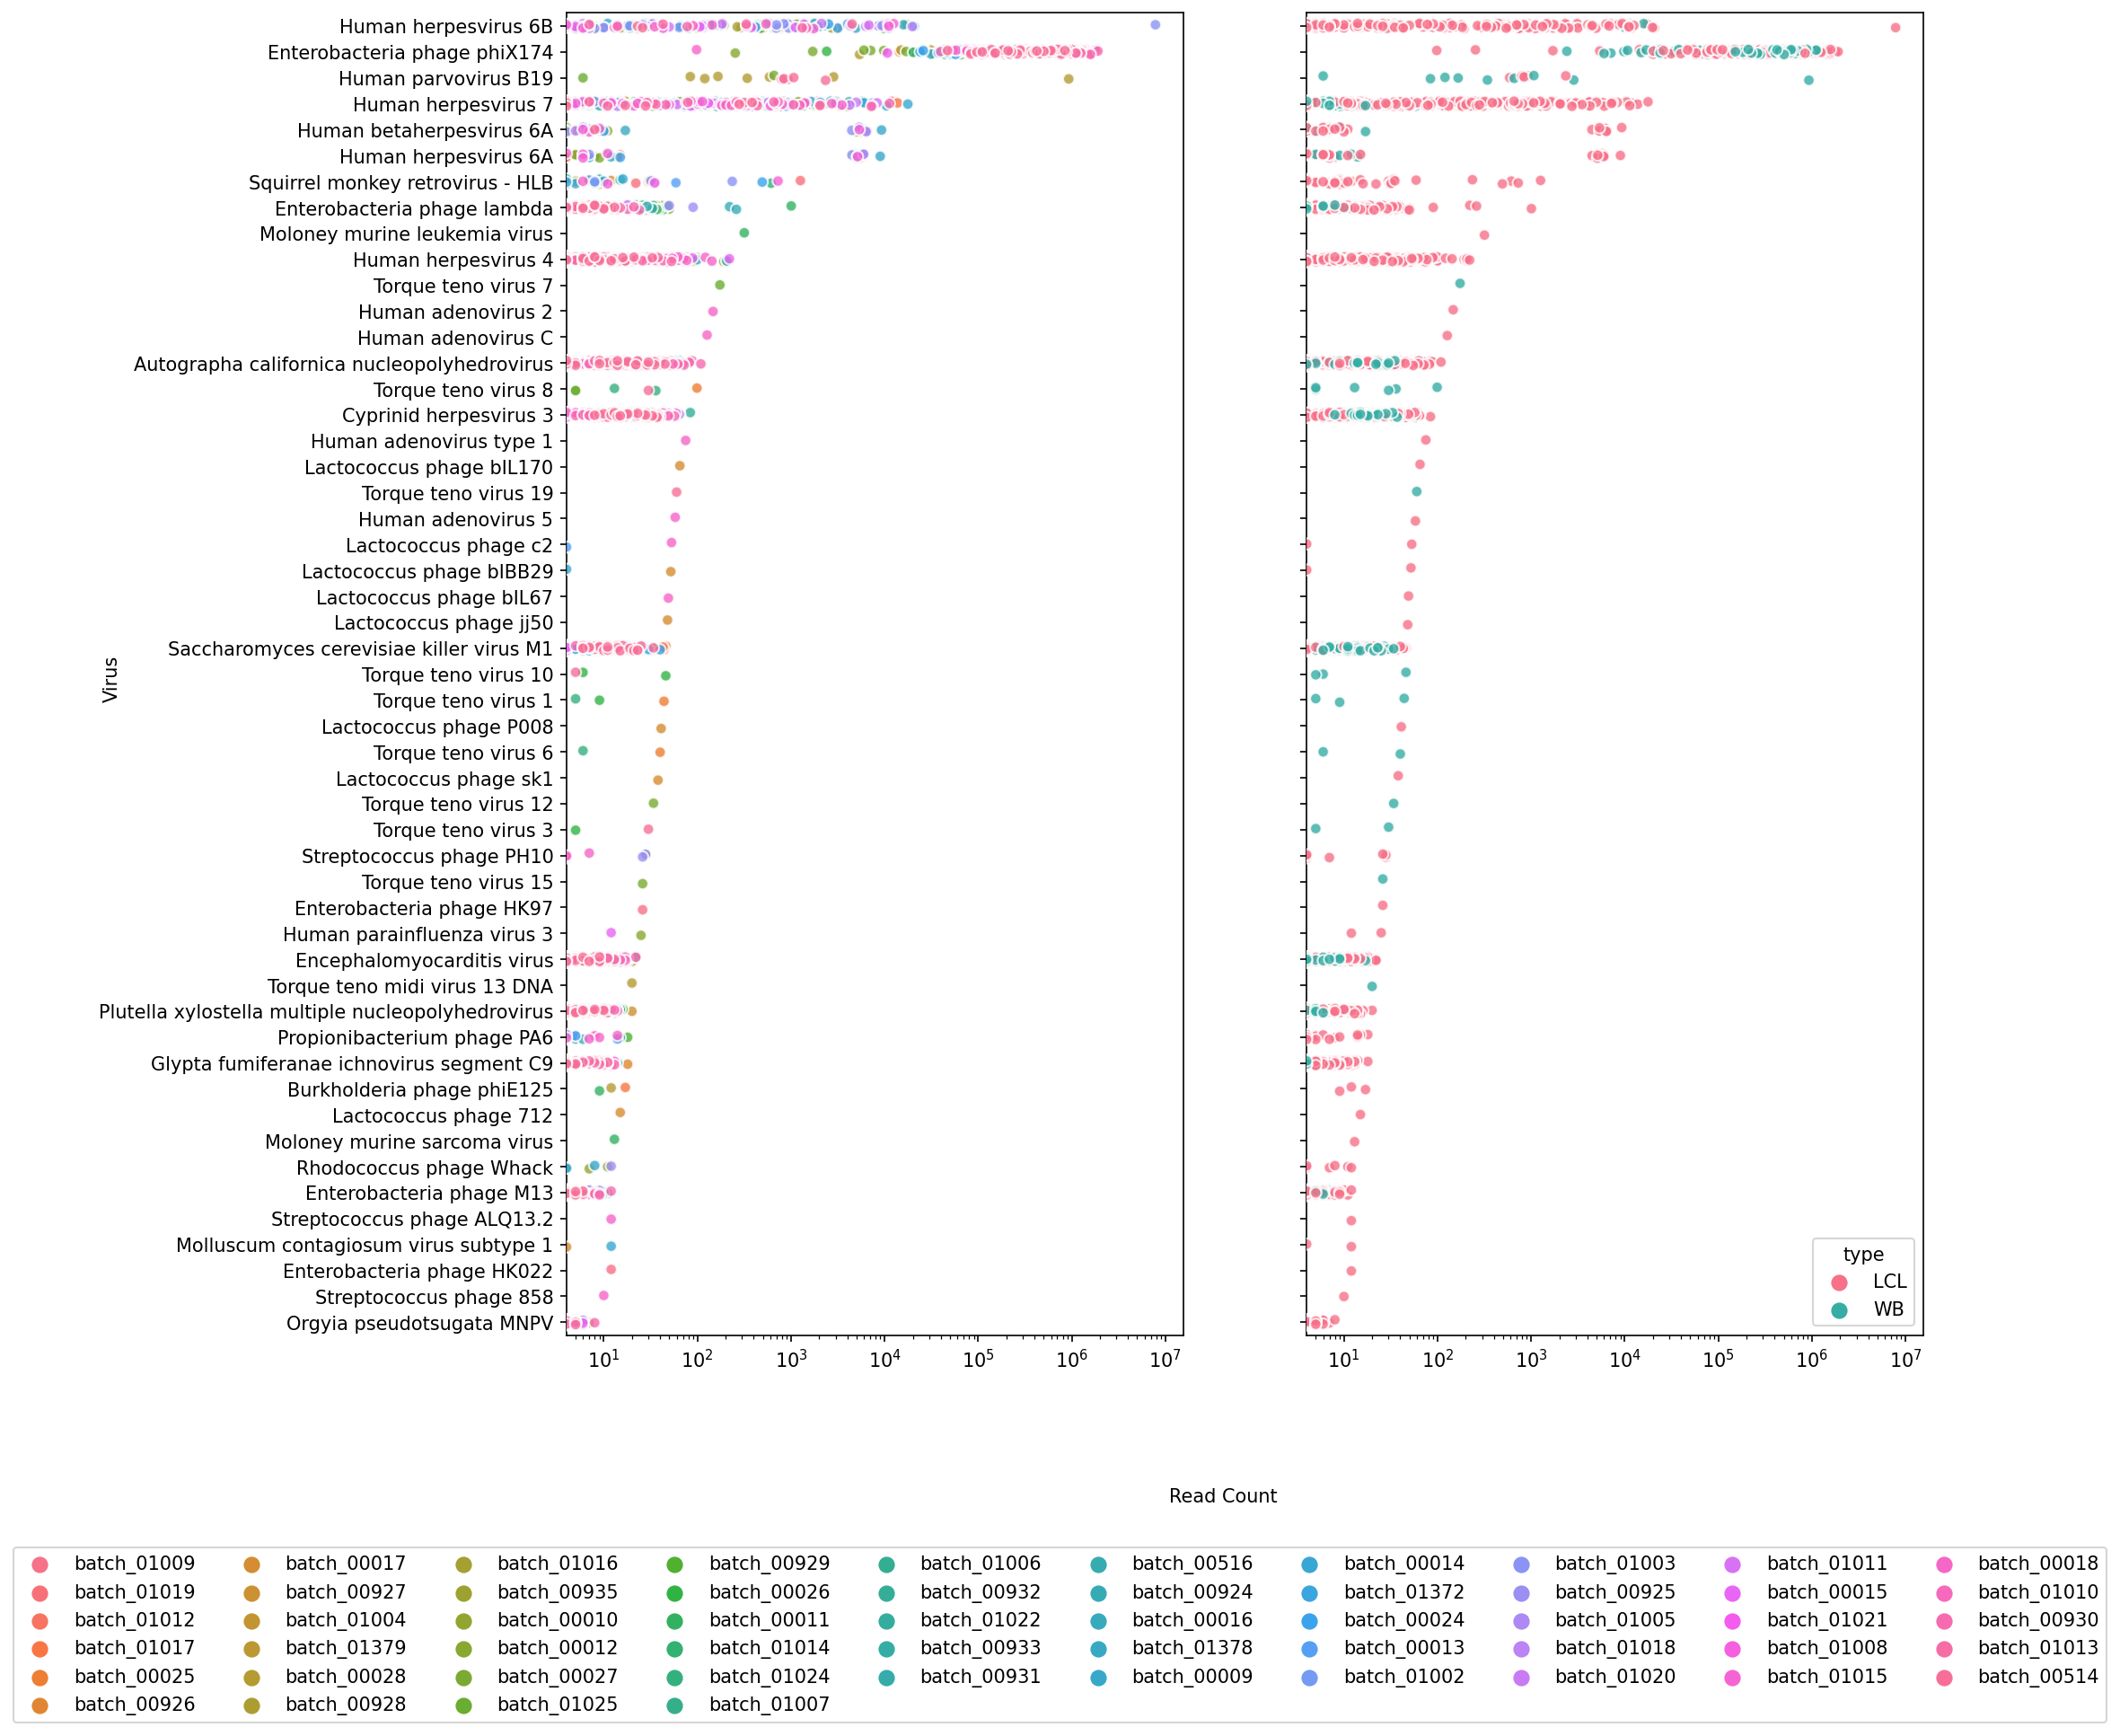

In [20]:
fig, axes = plt.subplots(figsize=(13,13), dpi=150, sharex=True, sharey=True, dpi=150)
ax1 = plt.subplot(121)
ax1.set(xscale="log")
sns.stripplot(data=df_melt, x='read counts', y='virus', hue='batch', orient='h', alpha=0.8,
                      linewidth=1, size=6, edgecolor='white', palette='husl')
plt.legend(loc="lower center", bbox_to_anchor=(0.8, -0.3), ncol=10)
ax1.set_ylabel('')    
ax1.set_xlabel('')

ax2 = plt.subplot(122)
ax2.set(xscale="log")
sns.stripplot(data=df_melt, x='read counts', y='virus', hue='type', orient='h', alpha=0.8,
                      linewidth=1, size=6, edgecolor='white', palette='husl')
ax2.set_ylabel('')    
ax2.set_xlabel('')
plt.setp(ax2.get_yticklabels(), visible=False)

fig.text(0.5, 0.03, 'Read Count', ha='center')
fig.text(-0.14, 0.5, 'Virus', va='center', rotation='vertical')
plt.show()

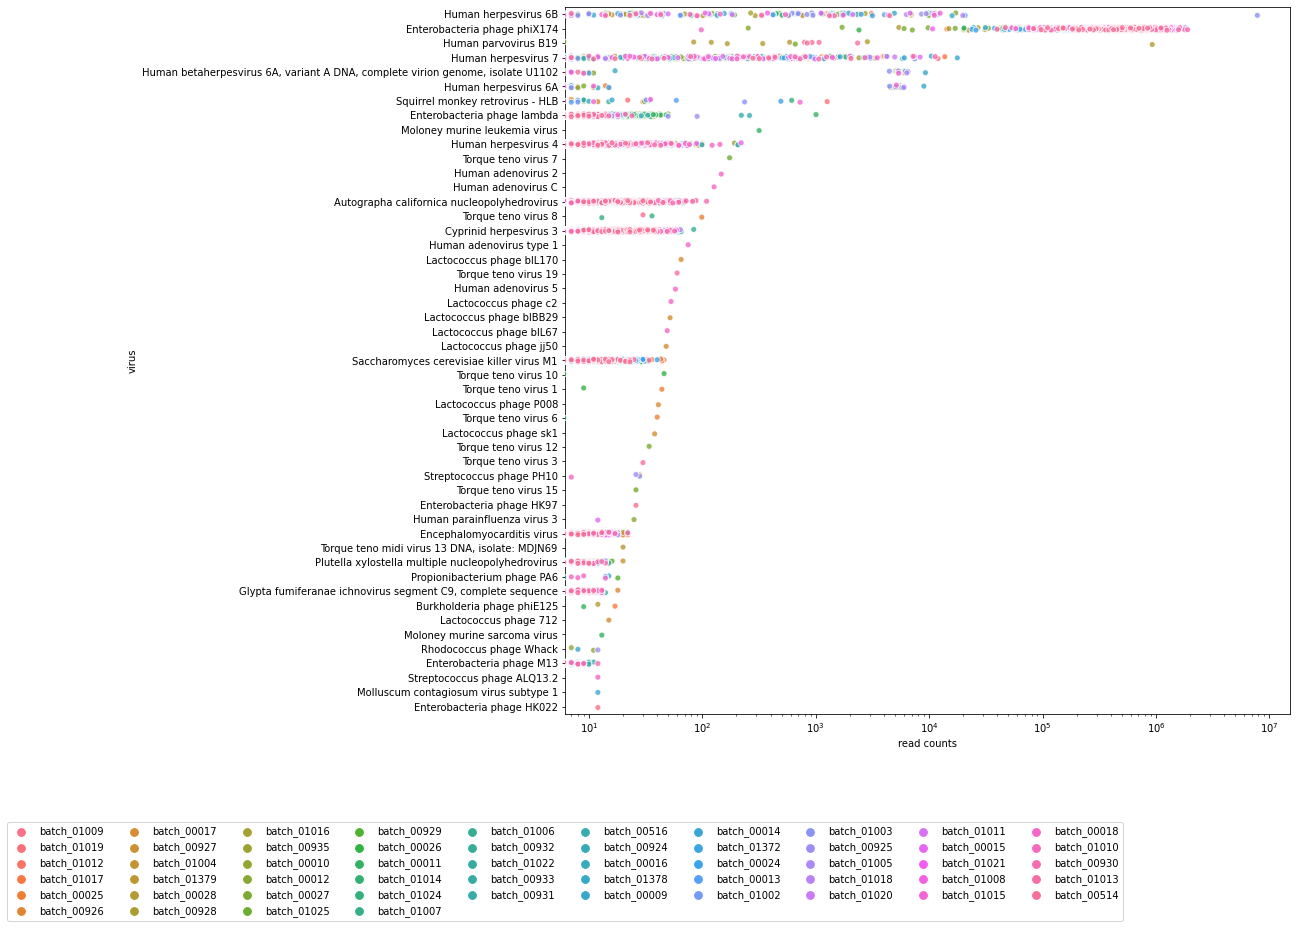

In [10]:
# fig, ax = plt.subplots(figsize=(13,13))
# ax.set(xscale="log")
# chart = sns.stripplot(data=df_melt, x='read counts', y='virus', hue='batch', orient='h', alpha=0.8,
#                       linewidth=1, size=6, edgecolor='white', palette='husl')
# plt.legend(loc="lower center", bbox_to_anchor=(0, -0.3), ncol=10)
# plt.show()

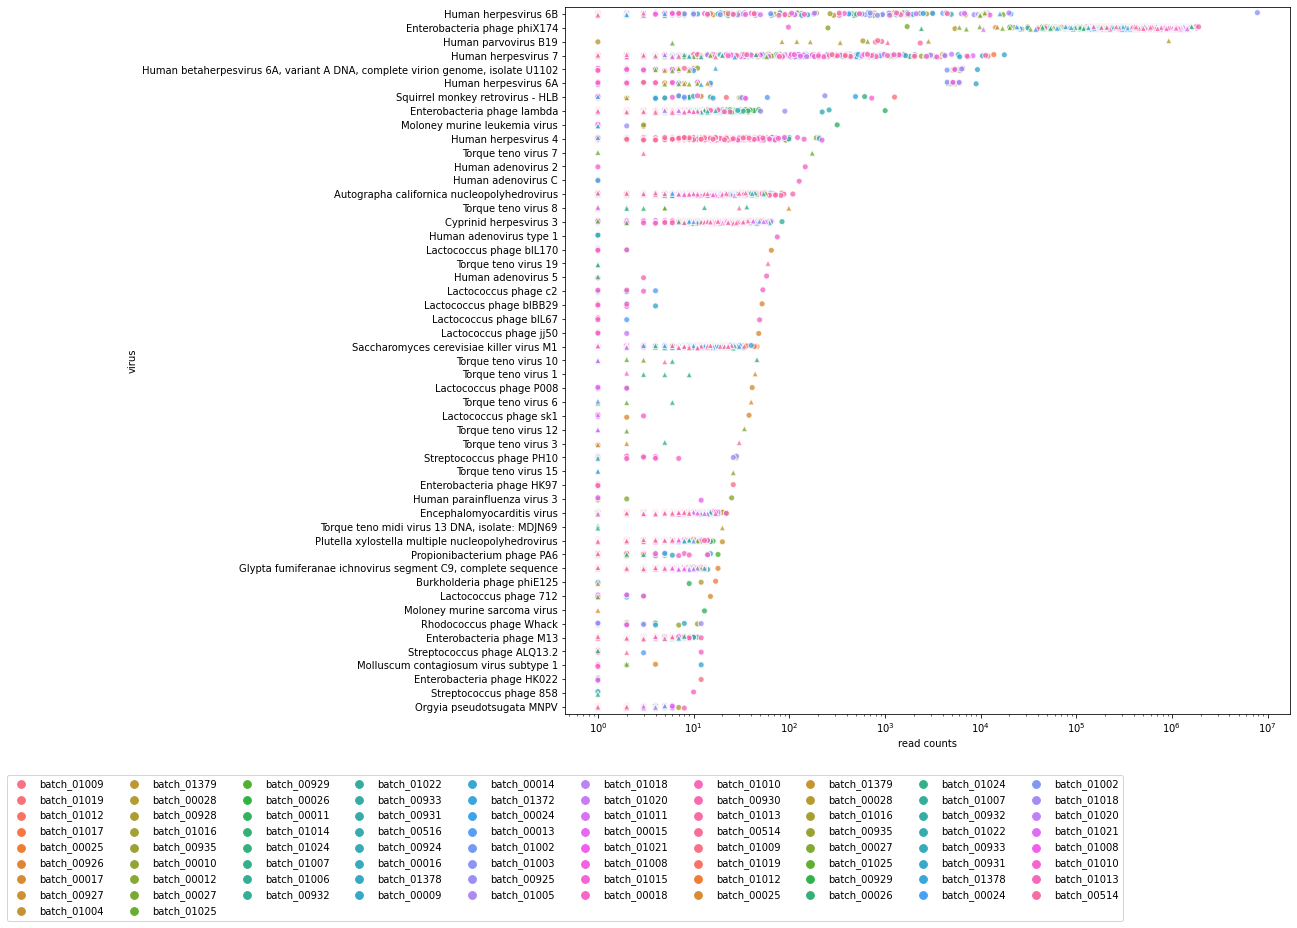

In [31]:
# # duplicate legends/coloring?

# fig, ax = plt.subplots(figsize=(13,13))
# ax.set(xscale="log")
# m = sns.stripplot(data=df_melt[df_melt['type'] == 'LCL'], x='read counts', y='virus', hue='batch', orient='h', alpha=0.8,
#                   linewidth=1, size=6, edgecolor='white', palette='husl', marker='o')
# n = sns.stripplot(data=df_melt[df_melt['type'] == 'WB'], x='read counts', y='virus', hue='batch', orient='h', alpha=0.8,
#                   linewidth=1, size=6, edgecolor='white', palette='husl', marker='^')
# plt.legend(loc="lower center", bbox_to_anchor=(0, -0.3), ncol=10)
# # handles, labels = n.get_legend_handles_labels()
# # n.legend(handles[:4], labels[:4])
# plt.show()

## Virus Clustered Heatmap

In [3]:
df = pd.read_csv('virus_abundance_data.csv', index_col=0)
column_labels = {x: x.split(', ')[0] for x in df.columns}
df.rename(columns=column_labels, inplace=True)
df.head()

batch  Human herpesvirus 6B  \
03C23190 - LCL - AU1157  batch_01009                   0.0   
03C23194 - WB - AU1157   batch_01009                   0.0   
03C23208 - WB - AU1157   batch_01009                   0.0   
03C23209 - WB - AU1157   batch_01009                   0.0   
03C23211 - WB - AU1157   batch_01009                   0.0   

                         Enterobacteria phage phiX174  Human parvovirus B19  \
03C23190 - LCL - AU1157                     1085585.0                   NaN   
03C23194 - WB - AU1157                      1064727.0                   NaN   
03C23208 - WB - AU1157                      1090048.0                   NaN   
03C23209 - WB - AU1157                      1057893.0                   NaN   
03C23211 - WB - AU1157                      1231973.0                   NaN   

                         Human herpesvirus 7  Human betaherpesvirus 6A  \
03C23190 - LCL - AU1157                  0.0                       NaN   
03C23194 - WB - AU1157                   0.0                       NaN   
03C23208 - WB - AU1157                   0.0                       NaN   
03C23209 - WB - AU1157                   1.0                       NaN   
03C23211 - WB - AU1157                   1.0                       NaN   

                         Human herpesvirus 6A  \
03C23190 - LCL - AU1157                   0.0   
03C23194 - WB - AU1157                    0.0   
03C23208 - WB - AU1157                    0.0   
03C23209 - WB - AU1157                    0.0   
03C23211 - WB - AU1157                    0.0   

                         Squirrel monkey retrovirus - HLB  \
03C23190 - LCL - AU1157                               NaN   
03C23194 - WB - AU1157                                NaN   
03C23208 - WB - AU1157                                NaN   
03C23209 - WB - AU1157                                NaN   
03C23211 - WB - AU1157                                NaN   

                         Enterobacteria phage lambda  \
03C23190 - LCL - AU1157                          9.0   
03C23194 - WB - AU1157                           5.0   
03C23208 - WB - AU1157                           6.0   
03C23209 - WB - AU1157                           9.0   
03C23211 - WB - AU1157                           5.0   

                         Moloney murine leukemia virus  ...  \
03C23190 - LCL - AU1157                            NaN  ...   
03C23194 - WB - AU1157                             NaN  ...   
03C23208 - WB - AU1157                             NaN  ...   
03C23209 - WB - AU1157                             NaN  ...   
03C23211 - WB - AU1157                             NaN  ...   

                         Torque teno mini virus 10 isolate LIL-y1 ORF2  \
03C23190 - LCL - AU1157                                            NaN   
03C23194 - WB - AU1157                                             NaN   
03C23208 - WB - AU1157                                             NaN   
03C23209 - WB - AU1157                                             NaN   
03C23211 - WB - AU1157                                             NaN   

                         Torque teno midi virus 8 DNA  \
03C23190 - LCL - AU1157                           NaN   
03C23194 - WB - AU1157                            NaN   
03C23208 - WB - AU1157                            NaN   
03C23209 - WB - AU1157                            NaN   
03C23211 - WB - AU1157                            NaN   

                         Hepatitis C virus genotype 1  \
03C23190 - LCL - AU1157                           NaN   
03C23194 - WB - AU1157                            NaN   
03C23208 - WB - AU1157                            NaN   
03C23209 - WB - AU1157                            NaN   
03C23211 - WB - AU1157                            NaN   

                         Lactobacillus phage Lv-1  Woodchuck hepatitis virus  \
03C23190 - LCL - AU1157                       NaN                        NaN   
03C23194 - WB - AU1157                        NaN                    

In [4]:
from sklearn.preprocessing import normalize
df_scaled = normalize(df.drop('batch', axis=1).fillna(0.), norm='l1', axis=0)
df_scaled = pd.DataFrame(df_scaled.T, index=df.drop('batch', axis=1).columns, columns=df.index)
print(df_scaled.shape)

(248, 4568)


In [41]:
df_scaled.sum(axis=1)

Human herpesvirus 6B            1.0
Enterobacteria phage phiX174    1.0
Human parvovirus B19            1.0
Human herpesvirus 7             1.0
Human betaherpesvirus 6A        1.0
                               ... 
Pseudomonas phage EL            1.0
Enterobacteria phage RB32       1.0
Bordetella phage BIP-1          1.0
Staphylococcus phage SAP-26     1.0
Enterococcus phage phiFL4A      1.0
Length: 248, dtype: float64

/home/users/chloehe/.local/lib/python3.6/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


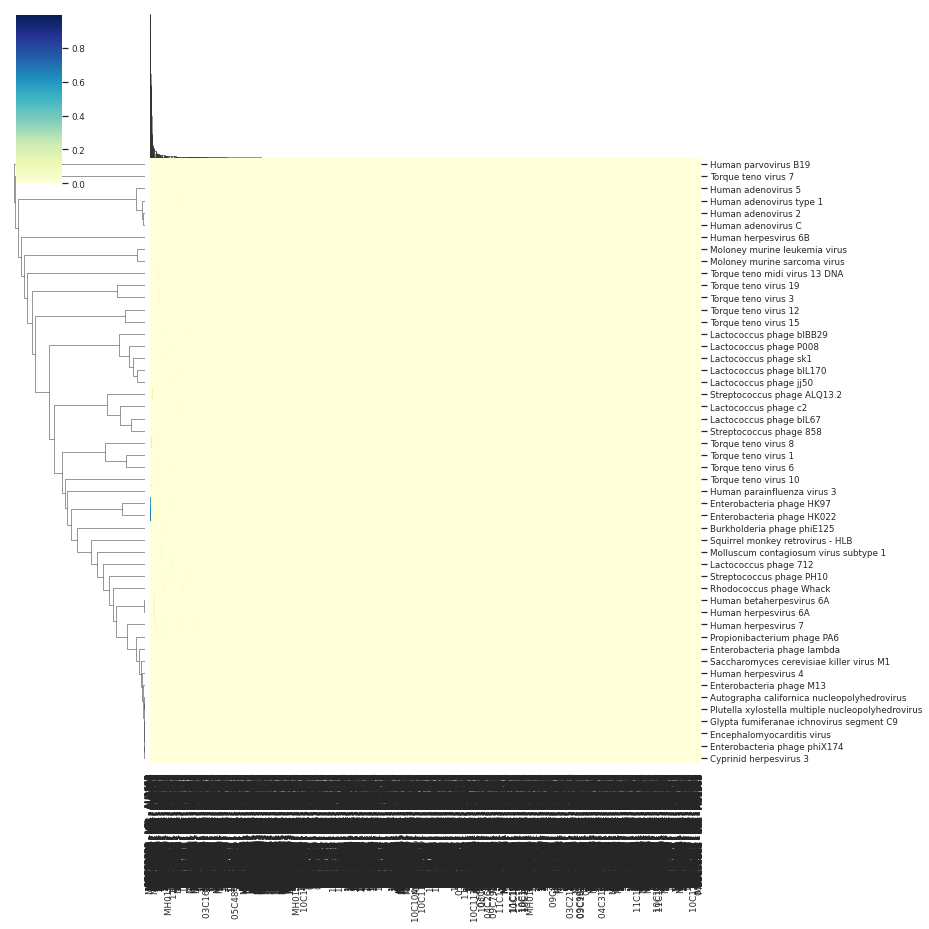

In [42]:
sns.set(font_scale=0.8)
fg = sns.clustermap(df_scaled.iloc[:50, :], cmap="YlGnBu", figsize=(13, 13), xticklabels=True)

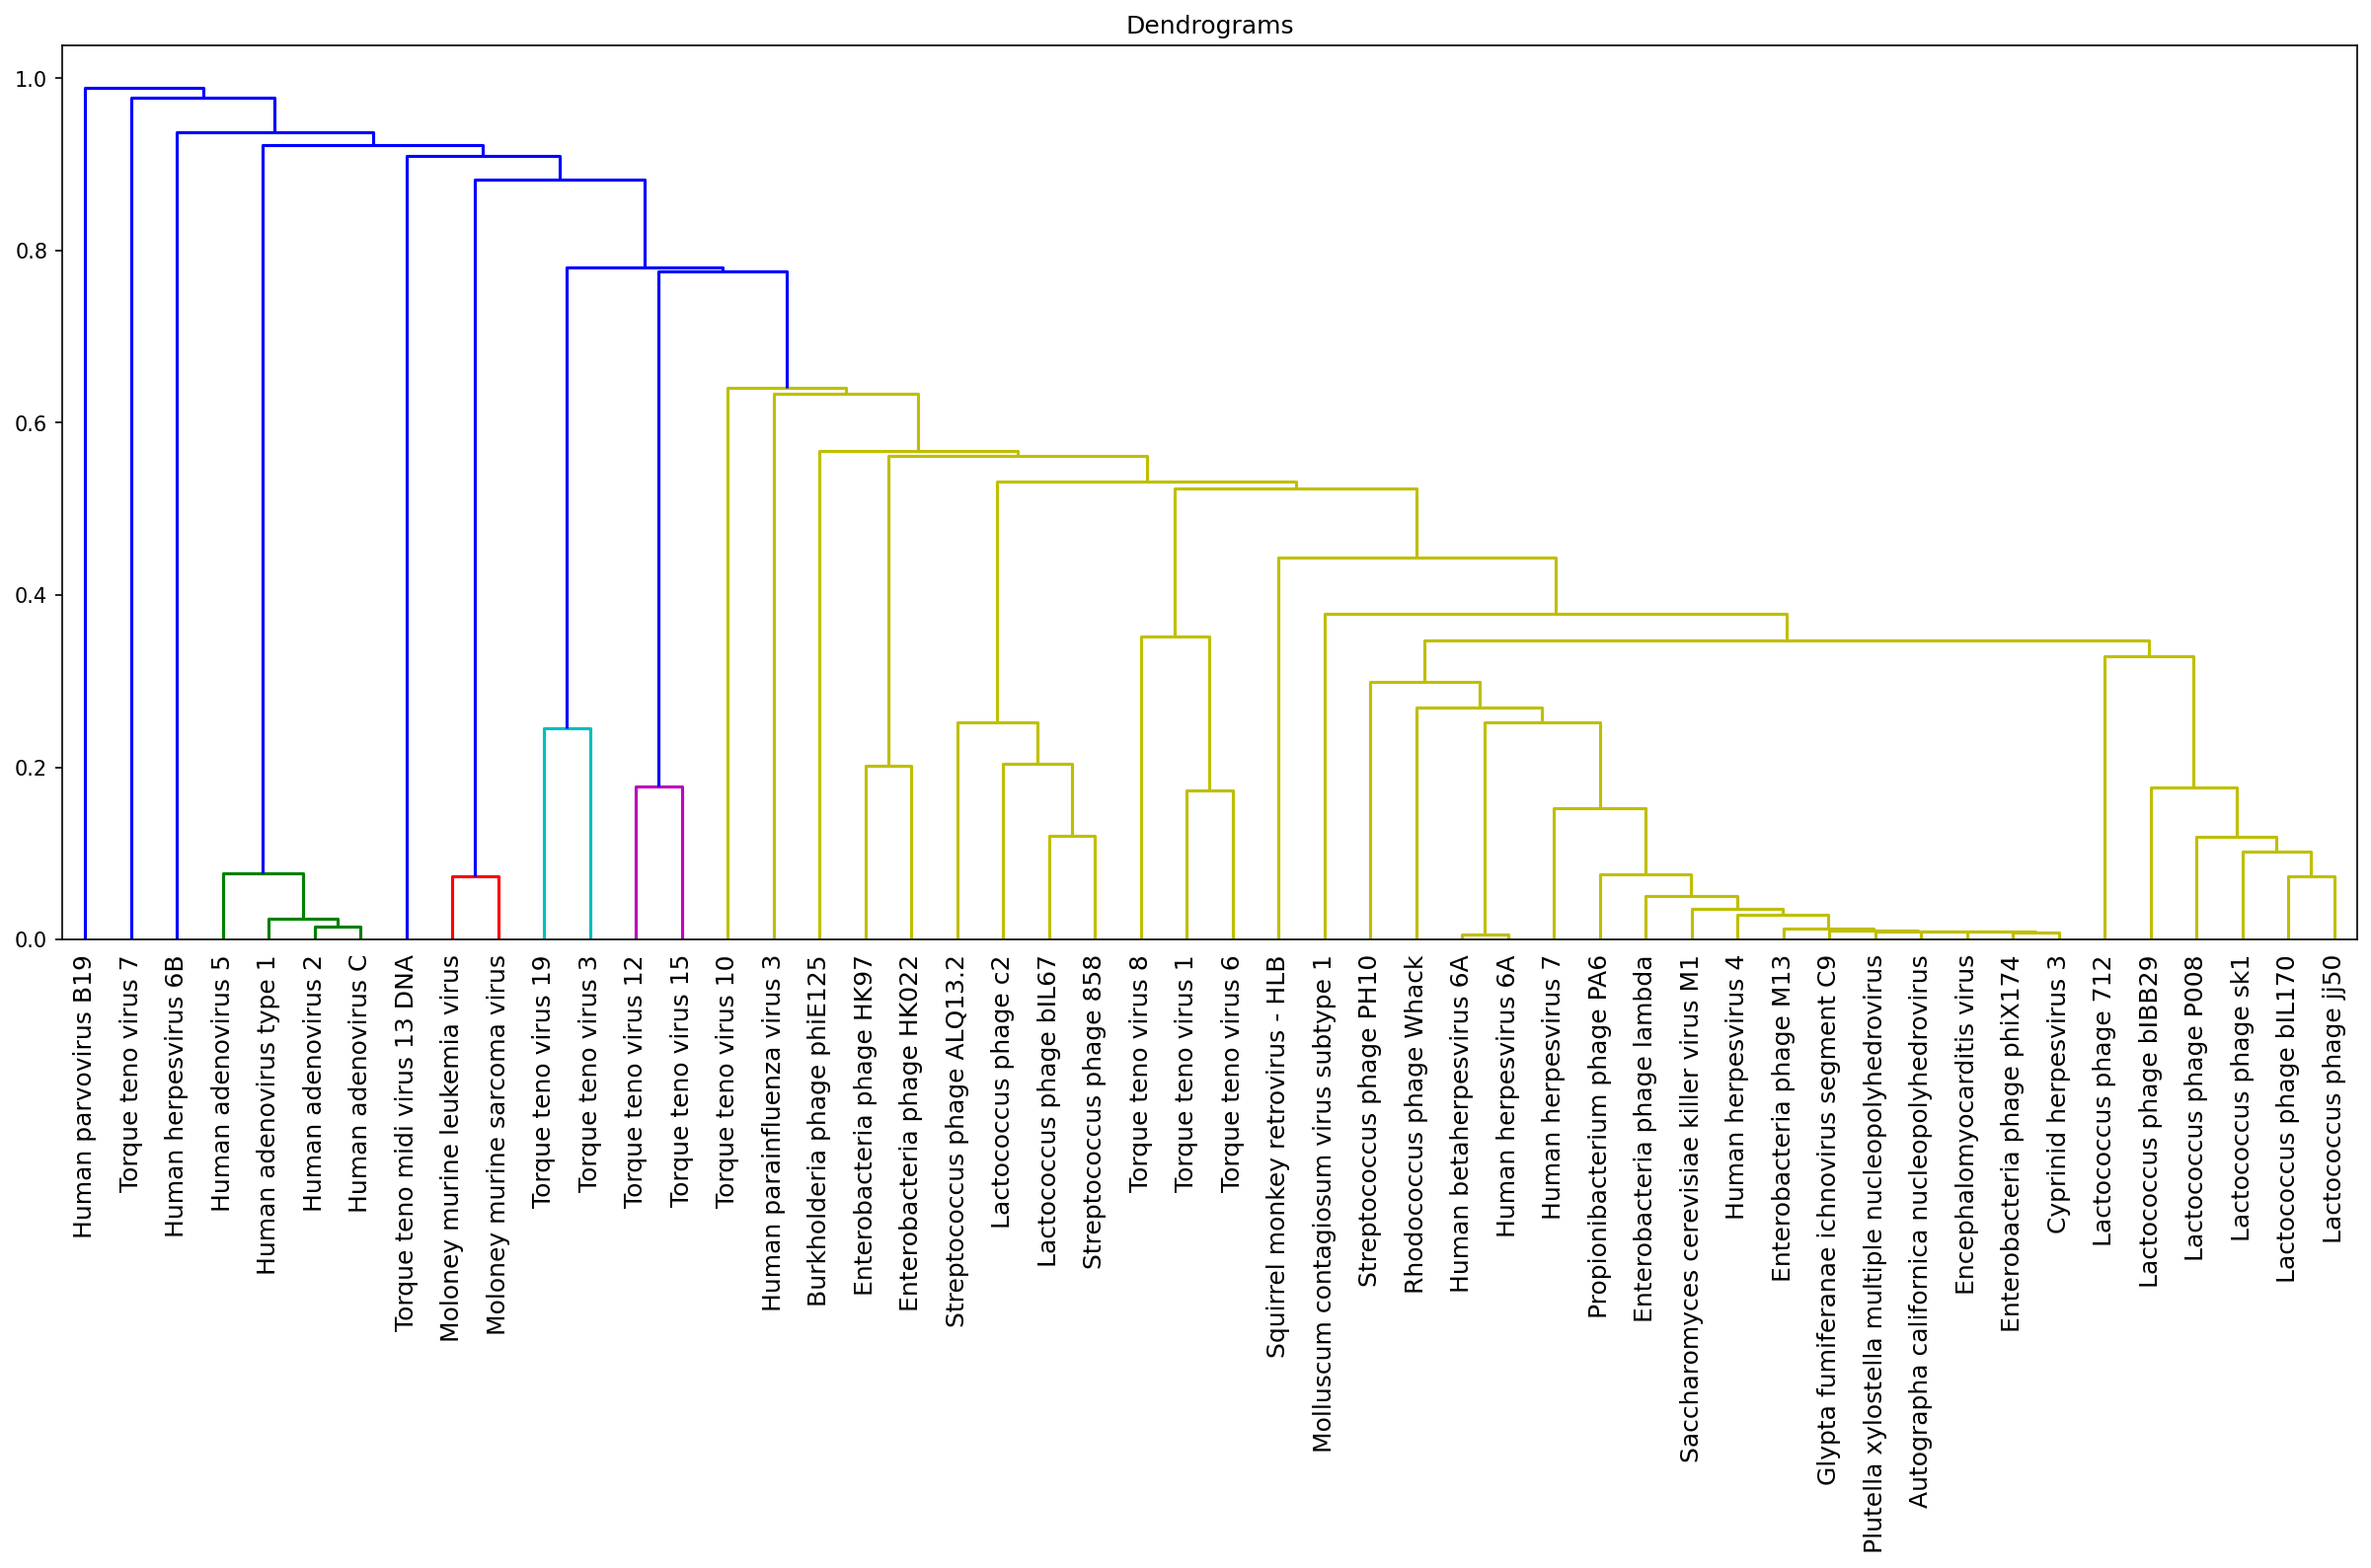

In [10]:
import scipy.cluster.hierarchy as shc
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(20, 8), dpi=150)
plt.title("Dendrograms")
cmap = plt.cm.rainbow(np.linspace(0, 1, 10))
# shc.set_link_color_palette([colors.rgb2hex(rgb[:3]) for rgb in cmap])
dend = shc.dendrogram(shc.linkage(df_scaled.iloc[:50, :].values), 
                      labels=df_scaled.iloc[:50, :].index)
ax.tick_params(axis='x', which='major', labelsize=12)

## Microbes Abundance Plot

In [10]:
df = pd.read_csv('/scratch/groups/dpwall/personal/briannac/unmapped_reads/microbes/results/bacteria_abundance_data_agg.csv', index_col=0, sep='\t')
df.head()

'Nostoc azollae' 0708  AECQ01000002  AECQ01000003  \
03C23190 - LCL - AU1157                    0.0           0.0           0.0   
03C23194 - WB - AU1157                     0.0           0.0           0.0   
03C23208 - WB - AU1157                     0.0           0.0           0.0   
03C23209 - WB - AU1157                     0.0           0.0           0.0   
03C23211 - WB - AU1157                     0.0           0.0           0.0   

                         AECQ01000004  AECQ01000006  AECQ01000007  \
03C23190 - LCL - AU1157           0.0           0.0           0.0   
03C23194 - WB - AU1157            0.0           0.0           0.0   
03C23208 - WB - AU1157            0.0           0.0           0.0   
03C23209 - WB - AU1157            0.0           0.0           0.0   
03C23211 - WB - AU1157            0.0           0.0           0.0   

                         AECQ01000008  AECQ01000011  AECQ01000012  \
03C23190 - LCL - AU1157           0.0           0.0           0.0   
03C23194 - WB - AU1157            0.0           0.0           0.0   
03C23208 - WB - AU1157            0.0           0.0           0.0   
03C23209 - WB - AU1157            0.0           0.0           0.0   
03C23211 - WB - AU1157            0.0           0.0           0.0   

                         AECQ01000013  ...  Yersinia pseudotuberculosis IP  \
03C23190 - LCL - AU1157           0.0  ...                             0.0   
03C23194 - WB - AU1157            0.0  ...                             0.0   
03C23208 - WB - AU1157            0.0  ...                             0.0   
03C23209 - WB - AU1157            0.0  ...                             0.0   
03C23211 - WB - AU1157            0.0  ...                             0.0   

                         Yersinia rohdei  Yersinia ruckeri  \
03C23190 - LCL - AU1157              0.0               0.0   
03C23194 - WB - AU1157               0.0               0.0   
03C23208 - WB - AU1157               0.0               0.0   
03C23209 - WB - AU1157               0.0               0.0   
03C23211 - WB - AU1157               0.0               0.0   

                         Zasmidium cellare culture-collection  \
03C23190 - LCL - AU1157                                   0.0   
03C23194 - WB - AU1157                                    0.0   
03C23208 - WB - AU1157                                    0.0   
03C23209 - WB - AU1157                                    0.0   
03C23211 - WB - AU1157                                    0.0   

                         Zunongwangia profunda SM-A87  \
03C23190 - LCL - AU1157                           0.0   
03C23194 - WB - AU1157                            0.0   
03C23208 - WB - AU1157                            0.0   
03C23209 - WB - AU1157                            0.0   
03C23211 - WB - AU1157                            0.0   

                         Zygosaccharomyces rouxii CBS  \
03C23190 - LCL - AU1157                           0.0   
03C23194 - WB - AU1157                            0.0   
03C23208 - WB - AU1157                            0.0   
03C23209 - WB - AU1157                            0.0   
03C23211 - WB - AU1157                            0.0   

                         Zymomonas mobilis mobilis  \
03C23190 - LCL - AU1157                        0.0   
03C23194 - WB - AU1157                         0.0   
03C23208 - WB - AU1157                         0.0   
03C23209 - WB - AU1157                         0.0   
03C23211 - WB - AU1157                         2.0   

                         marine gamma proteobacterium  type        batch  
03C23190 - LCL - AU1157                           0.0   LCL  batch_01009  
03C23194 - WB - AU1157                            0.0    WB  batch_01009  
03C23208 - WB - AU1157                            0.0    WB  batch_01009  
03C23209 - WB - AU1157                            0.0    WB  batch_01009  
03C23211 - WB - AU1157                            0.0    WB  batch_01009  

[5 rows x 2177 columns]

In [8]:
df_sorted = df.drop(['batch', 'type'], axis=1)
df_sorted = df_sorted.append(df_sorted.max().rename('max'))
df_sorted = df_sorted.sort_values(by='max', axis=1, ascending=False)
df_sorted.drop('max', axis=0, inplace=True)
df_sorted['type'] = df['type']
df_sorted['batch'] = df['batch']

columns = list(df_sorted.columns[:50])
columns.extend(['type', 'batch'])

# take top 50
df_melt = pd.melt(df_sorted.loc[:, columns].reset_index(), id_vars=['index', 'batch', 'type'])
df_melt.rename(columns={'variable': 'microbe', 'value': 'read counts'}, inplace=True)

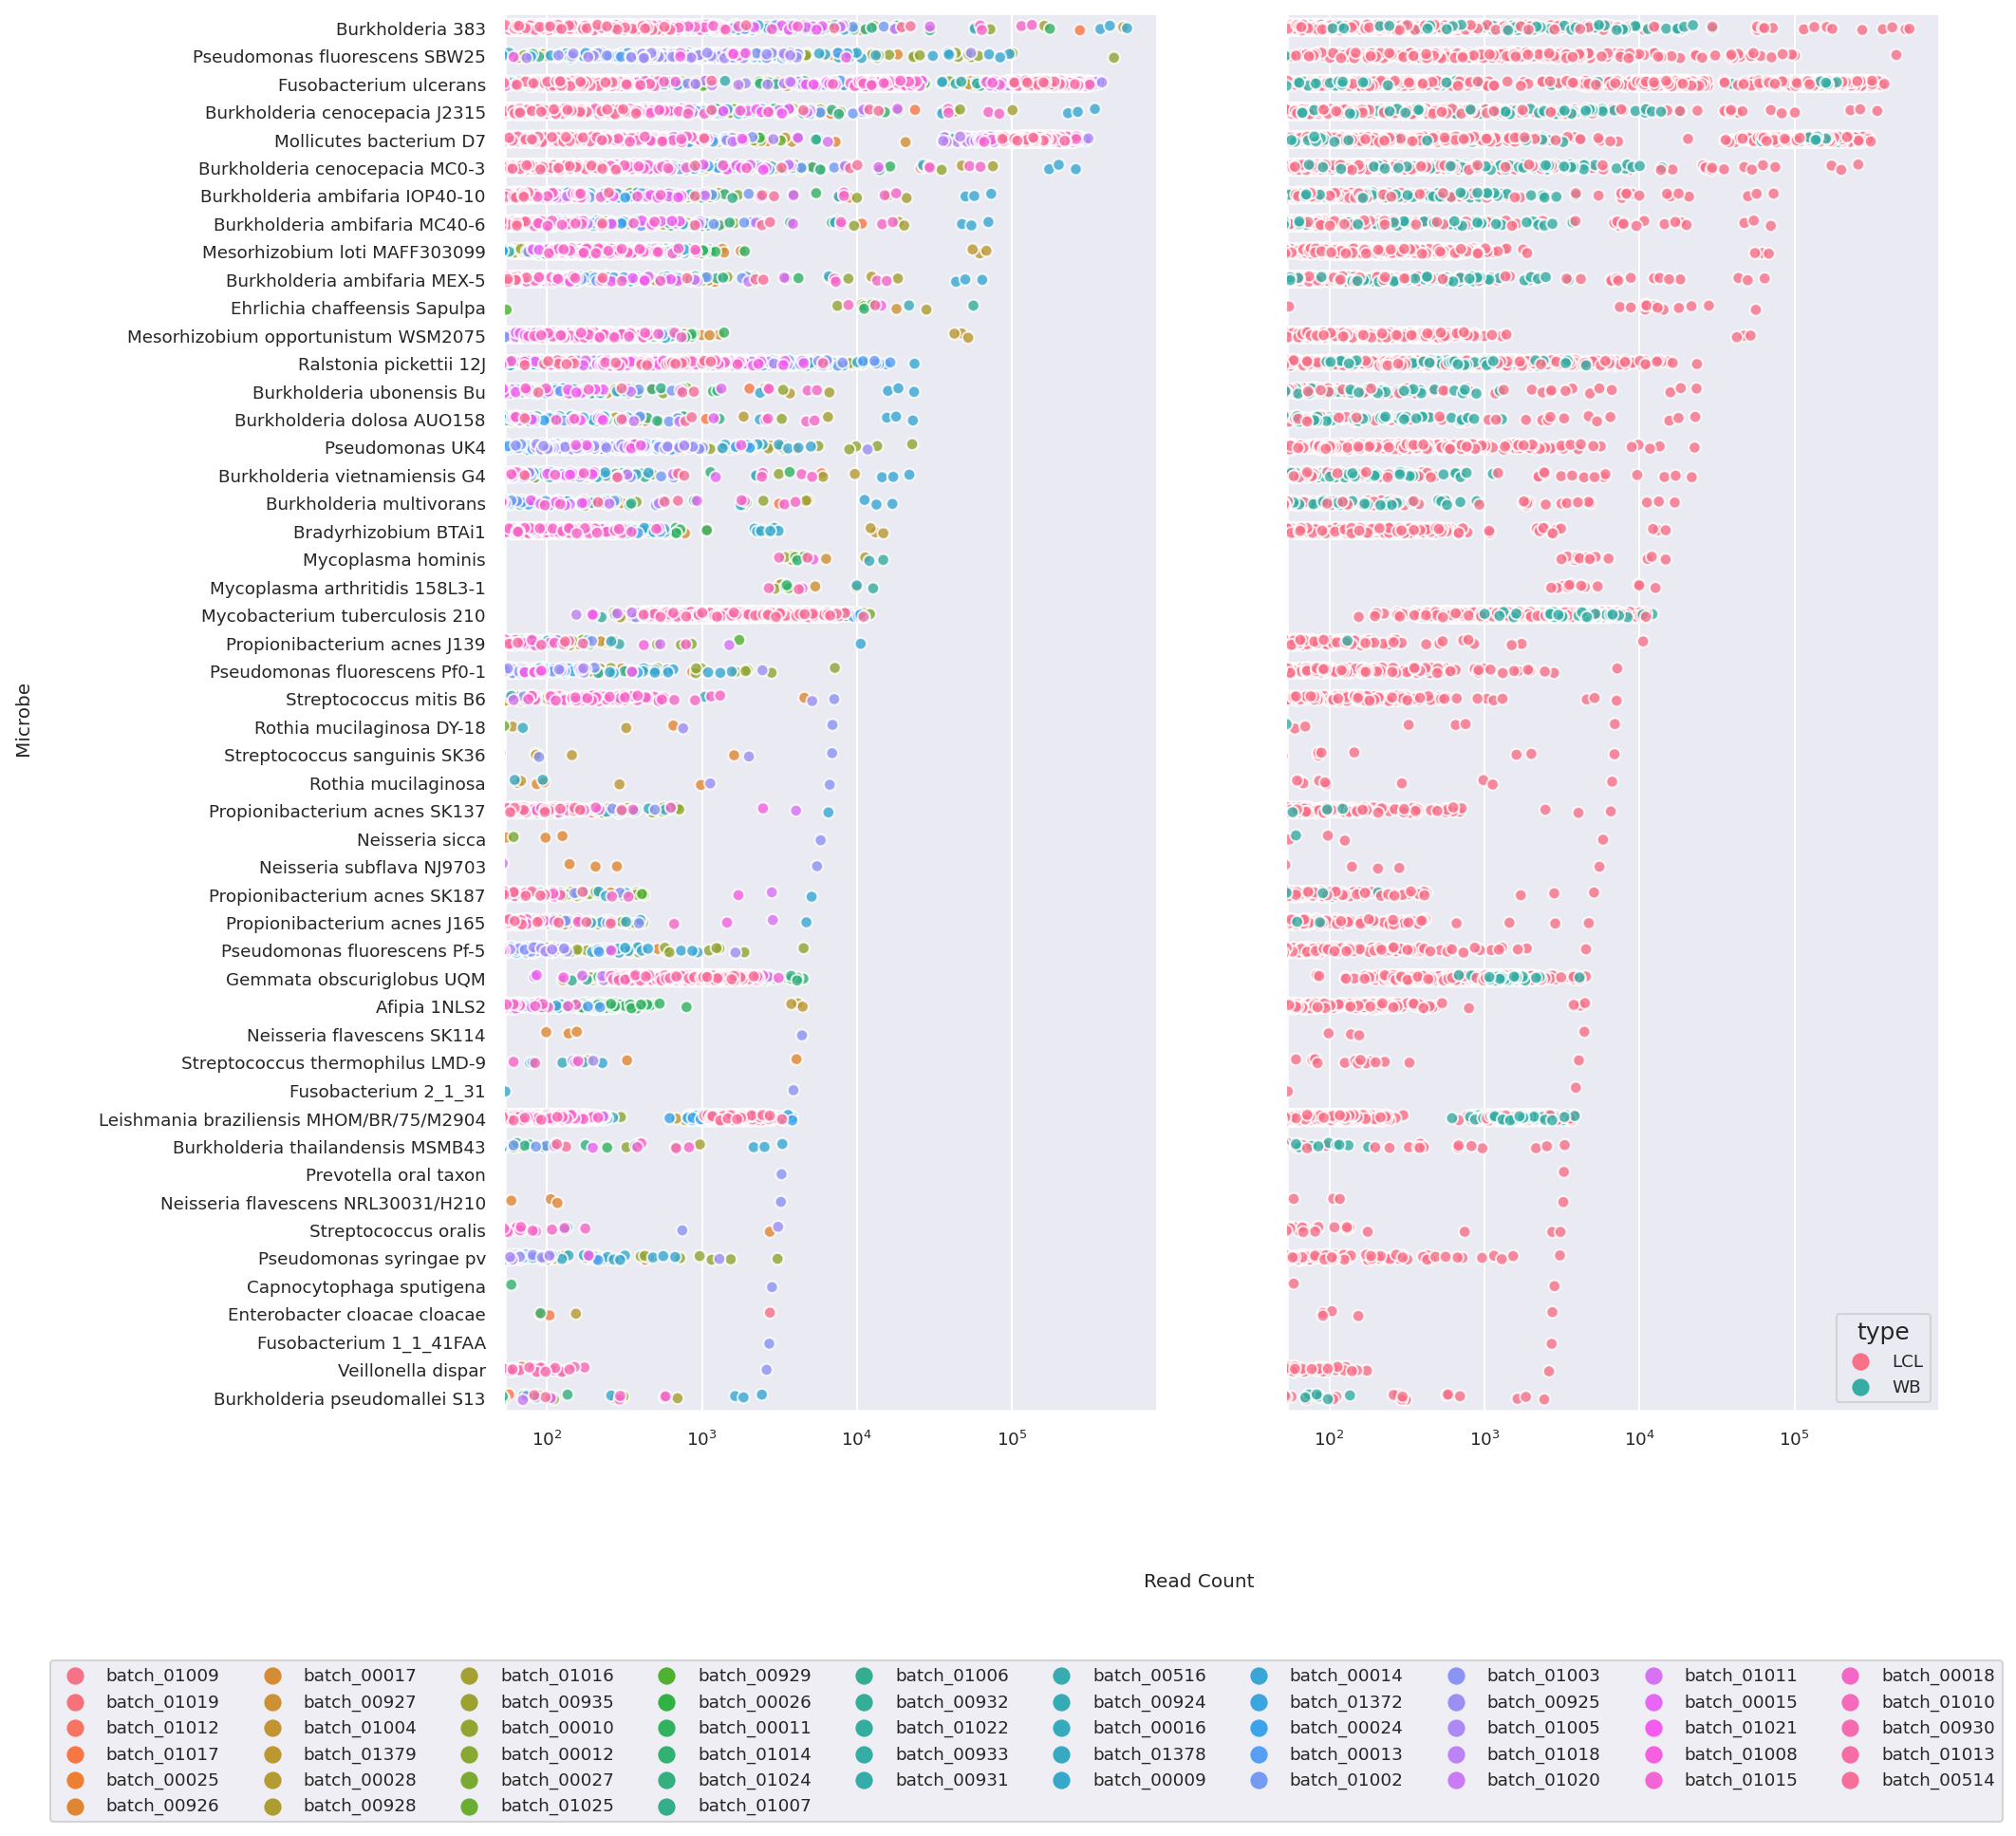

In [10]:
fig, axes = plt.subplots(figsize=(13,13), dpi=150, sharex=True, sharey=True)
ax1 = plt.subplot(121)
ax1.set(xscale="log")
sns.stripplot(data=df_melt, x='read counts', y='microbe', hue='batch', orient='h', alpha=0.8,
                      linewidth=1, size=6, edgecolor='white', palette='husl')
plt.legend(loc="lower center", bbox_to_anchor=(0.8, -0.3), ncol=10)
ax1.set_ylabel('')    
ax1.set_xlabel('')

ax2 = plt.subplot(122)
ax2.set(xscale="log")
sns.stripplot(data=df_melt, x='read counts', y='microbe', hue='type', orient='h', alpha=0.8,
                      linewidth=1, size=6, edgecolor='white', palette='husl')
ax2.set_ylabel('')    
ax2.set_xlabel('')
plt.setp(ax2.get_yticklabels(), visible=False)

fig.text(0.5, 0.03, 'Read Count', ha='center')
fig.text(-0.14, 0.5, 'Microbe', va='center', rotation='vertical')
plt.show()

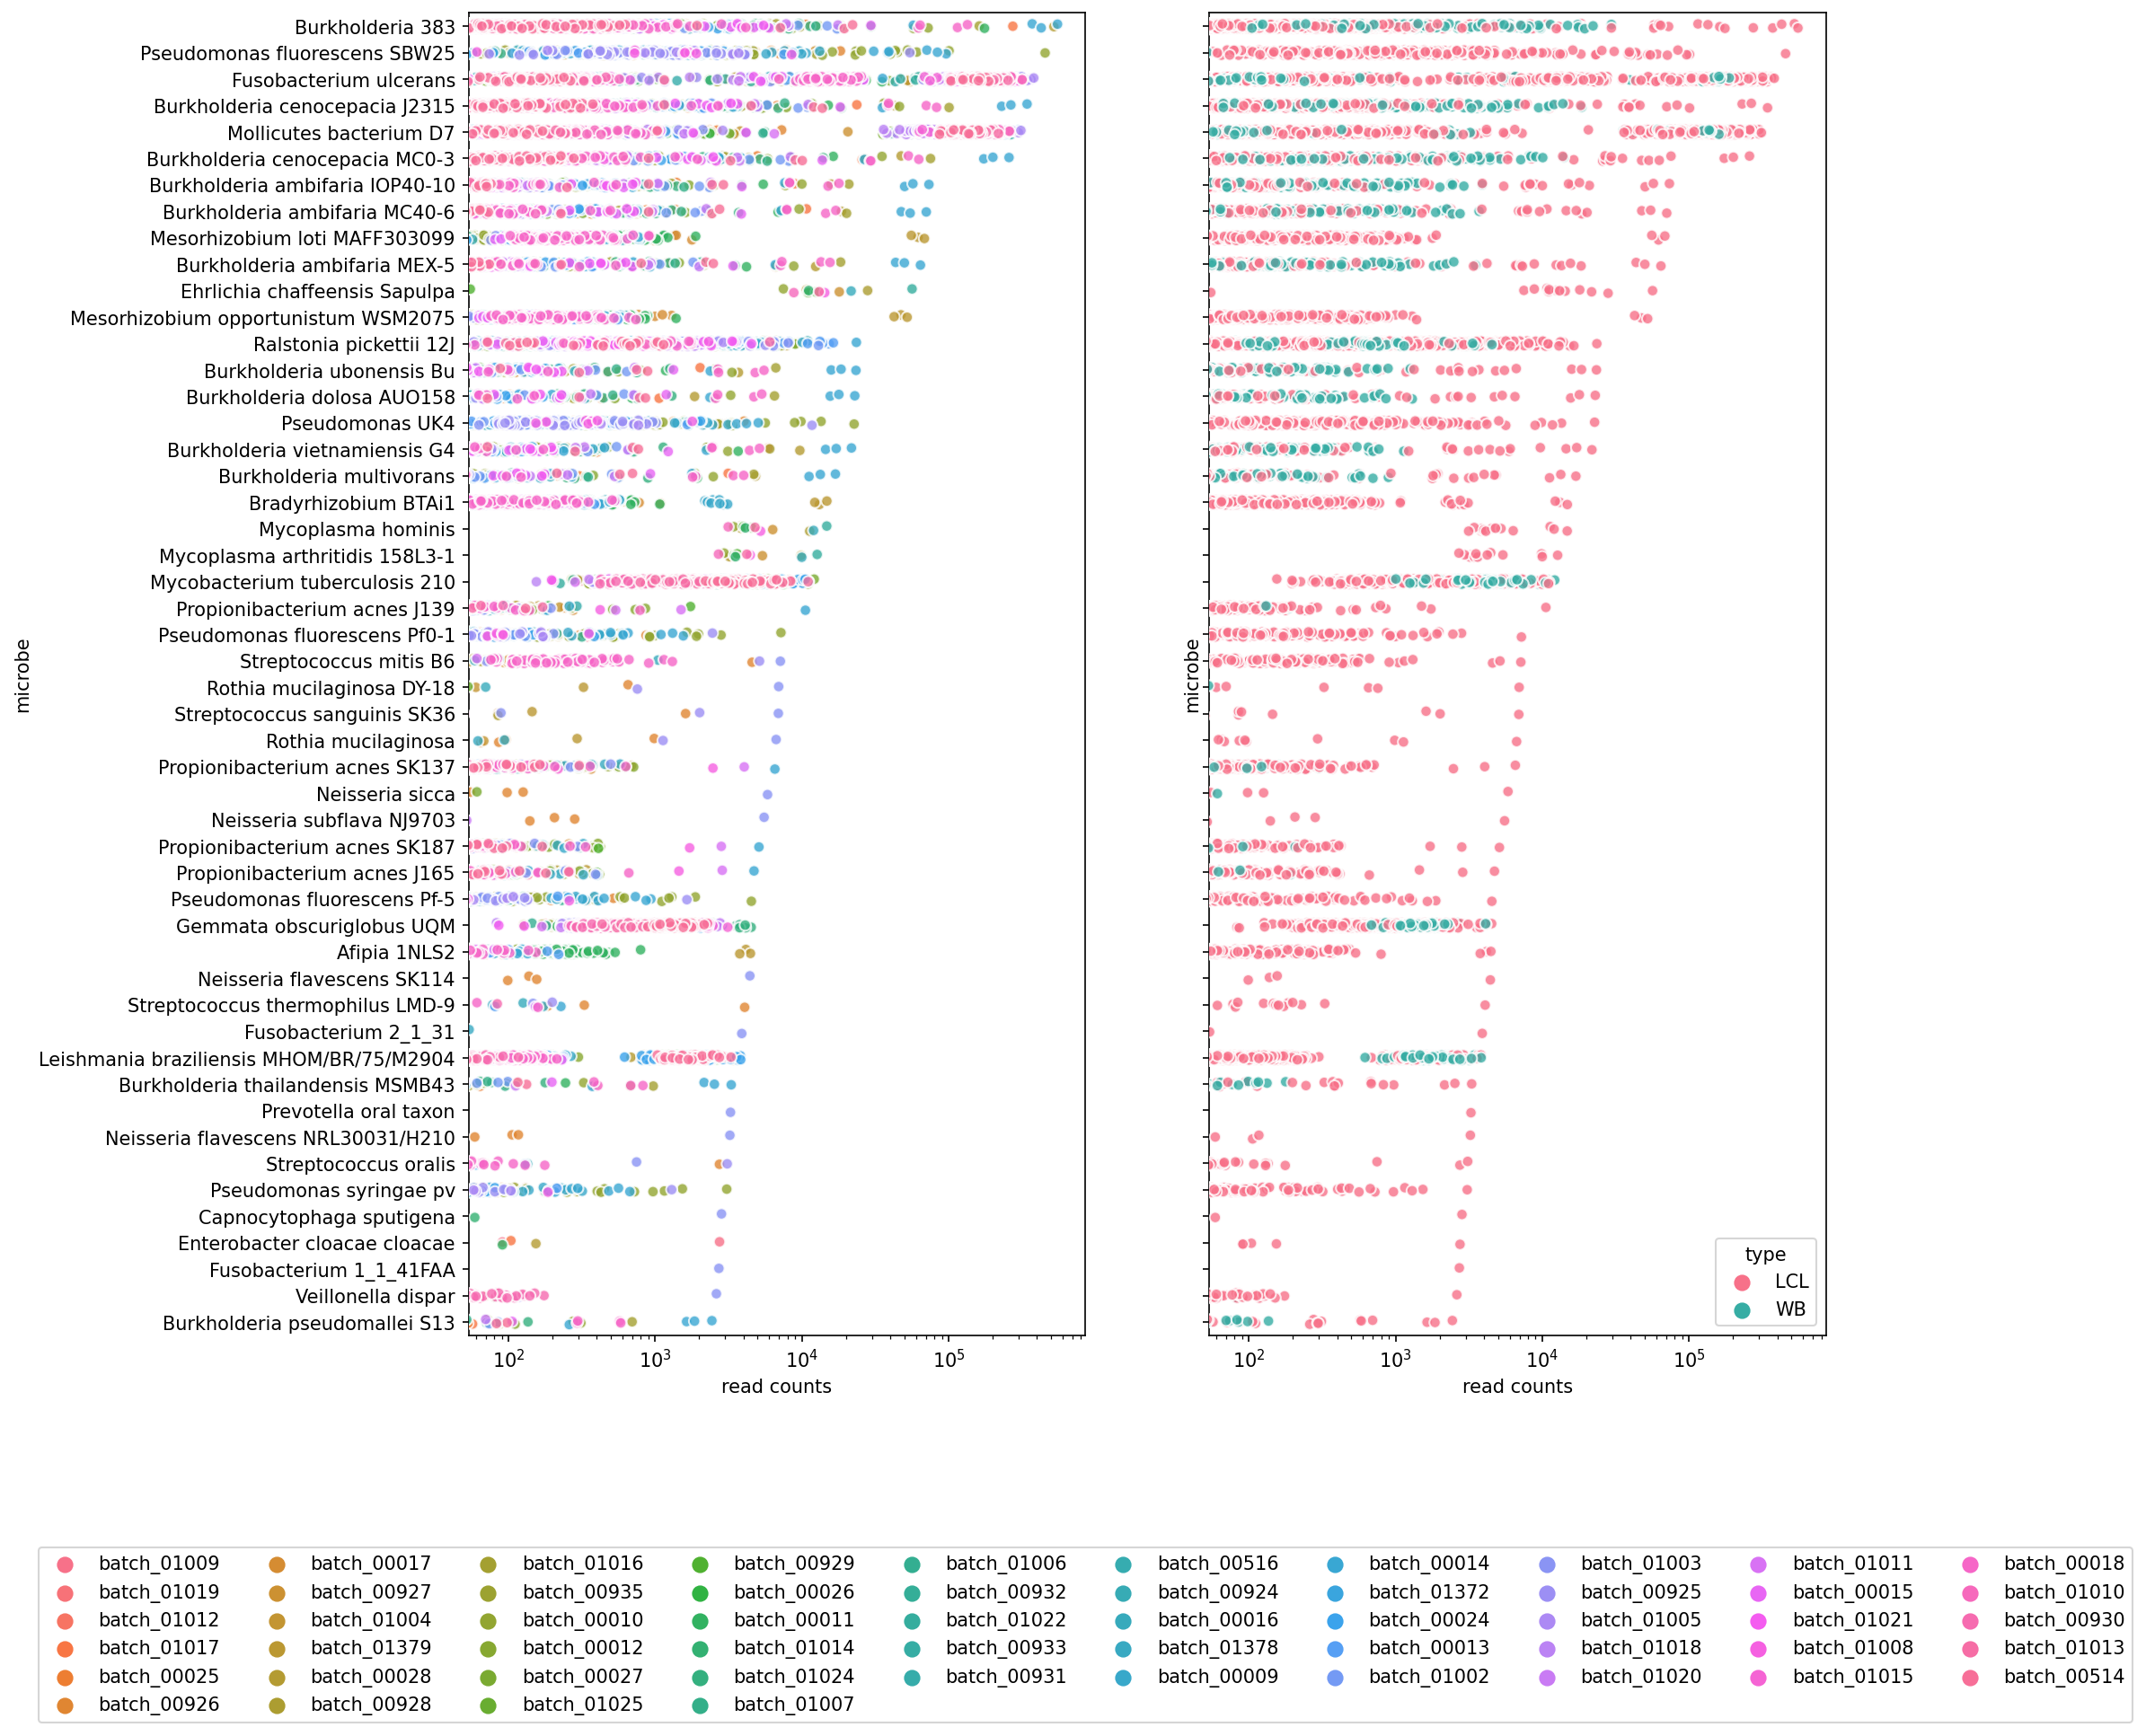

In [30]:
# fig, axes = plt.subplots(figsize=(13,13), sharex=True, sharey=True, dpi=150)
# ax1 = plt.subplot(121)
# ax1.set(xscale="log")
# sns.stripplot(data=df_melt, x='read counts', y='microbe', hue='batch', orient='h', alpha=0.8,
#                       linewidth=1, size=6, edgecolor='white', palette='husl')
# plt.legend(loc="lower center", bbox_to_anchor=(1, -0.3), ncol=10)

# ax2 = plt.subplot(122)
# ax2.set(xscale="log")
# sns.stripplot(data=df_melt, x='read counts', y='microbe', hue='type', orient='h', alpha=0.8,
#                       linewidth=1, size=6, edgecolor='white', palette='husl')
# plt.setp(ax2.get_yticklabels(), visible=False)
# plt.show()

## Microbe Clustered Heatmap

In [2]:
df = pd.read_csv('/scratch/groups/dpwall/personal/briannac/unmapped_reads/microbes/results/bacteria_abundance_data_agg.csv', index_col=0, sep='\t')
df.head()

'Nostoc azollae' 0708  AECQ01000002  AECQ01000003  \
03C23190 - LCL - AU1157                    0.0           0.0           0.0   
03C23194 - WB - AU1157                     0.0           0.0           0.0   
03C23208 - WB - AU1157                     0.0           0.0           0.0   
03C23209 - WB - AU1157                     0.0           0.0           0.0   
03C23211 - WB - AU1157                     0.0           0.0           0.0   

                         AECQ01000004  AECQ01000006  AECQ01000007  \
03C23190 - LCL - AU1157           0.0           0.0           0.0   
03C23194 - WB - AU1157            0.0           0.0           0.0   
03C23208 - WB - AU1157            0.0           0.0           0.0   
03C23209 - WB - AU1157            0.0           0.0           0.0   
03C23211 - WB - AU1157            0.0           0.0           0.0   

                         AECQ01000008  AECQ01000011  AECQ01000012  \
03C23190 - LCL - AU1157           0.0           0.0           0.0   
03C23194 - WB - AU1157            0.0           0.0           0.0   
03C23208 - WB - AU1157            0.0           0.0           0.0   
03C23209 - WB - AU1157            0.0           0.0           0.0   
03C23211 - WB - AU1157            0.0           0.0           0.0   

                         AECQ01000013  ...  Yersinia pseudotuberculosis IP  \
03C23190 - LCL - AU1157           0.0  ...                             0.0   
03C23194 - WB - AU1157            0.0  ...                             0.0   
03C23208 - WB - AU1157            0.0  ...                             0.0   
03C23209 - WB - AU1157            0.0  ...                             0.0   
03C23211 - WB - AU1157            0.0  ...                             0.0   

                         Yersinia rohdei  Yersinia ruckeri  \
03C23190 - LCL - AU1157              0.0               0.0   
03C23194 - WB - AU1157               0.0               0.0   
03C23208 - WB - AU1157               0.0               0.0   
03C23209 - WB - AU1157               0.0               0.0   
03C23211 - WB - AU1157               0.0               0.0   

                         Zasmidium cellare culture-collection  \
03C23190 - LCL - AU1157                                   0.0   
03C23194 - WB - AU1157                                    0.0   
03C23208 - WB - AU1157                                    0.0   
03C23209 - WB - AU1157                                    0.0   
03C23211 - WB - AU1157                                    0.0   

                         Zunongwangia profunda SM-A87  \
03C23190 - LCL - AU1157                           0.0   
03C23194 - WB - AU1157                            0.0   
03C23208 - WB - AU1157                            0.0   
03C23209 - WB - AU1157                            0.0   
03C23211 - WB - AU1157                            0.0   

                         Zygosaccharomyces rouxii CBS  \
03C23190 - LCL - AU1157                           0.0   
03C23194 - WB - AU1157                            0.0   
03C23208 - WB - AU1157                            0.0   
03C23209 - WB - AU1157                            0.0   
03C23211 - WB - AU1157                            0.0   

                         Zymomonas mobilis mobilis  \
03C23190 - LCL - AU1157                        0.0   
03C23194 - WB - AU1157                         0.0   
03C23208 - WB - AU1157                         0.0   
03C23209 - WB - AU1157                         0.0   
03C23211 - WB - AU1157                         2.0   

                         marine gamma proteobacterium  type        batch  
03C23190 - LCL - AU1157                           0.0   LCL  batch_01009  
03C23194 - WB - AU1157                            0.0    WB  batch_01009  
03C23208 - WB - AU1157                            0.0    WB  batch_01009  
03C23209 - WB - AU1157                            0.0    WB  batch_01009  
03C23211 - WB - AU1157                            0.0    WB  batch_01009  

[5 rows x 2177 columns]

In [3]:
df_sorted = df.drop(['batch', 'type'], axis=1)
df_sorted = df_sorted.append(df_sorted.max().rename('max'))
df_sorted = df_sorted.sort_values(by='max', axis=1, ascending=False)
df_sorted.drop('max', axis=0, inplace=True)

In [4]:
from sklearn.preprocessing import normalize
df_scaled = normalize(df_sorted.fillna(0.), norm='l1', axis=0)
df_scaled = pd.DataFrame(df_scaled.T, index=df_sorted.columns, columns=df_sorted.index)
print(df_scaled.shape)

(2175, 4568)


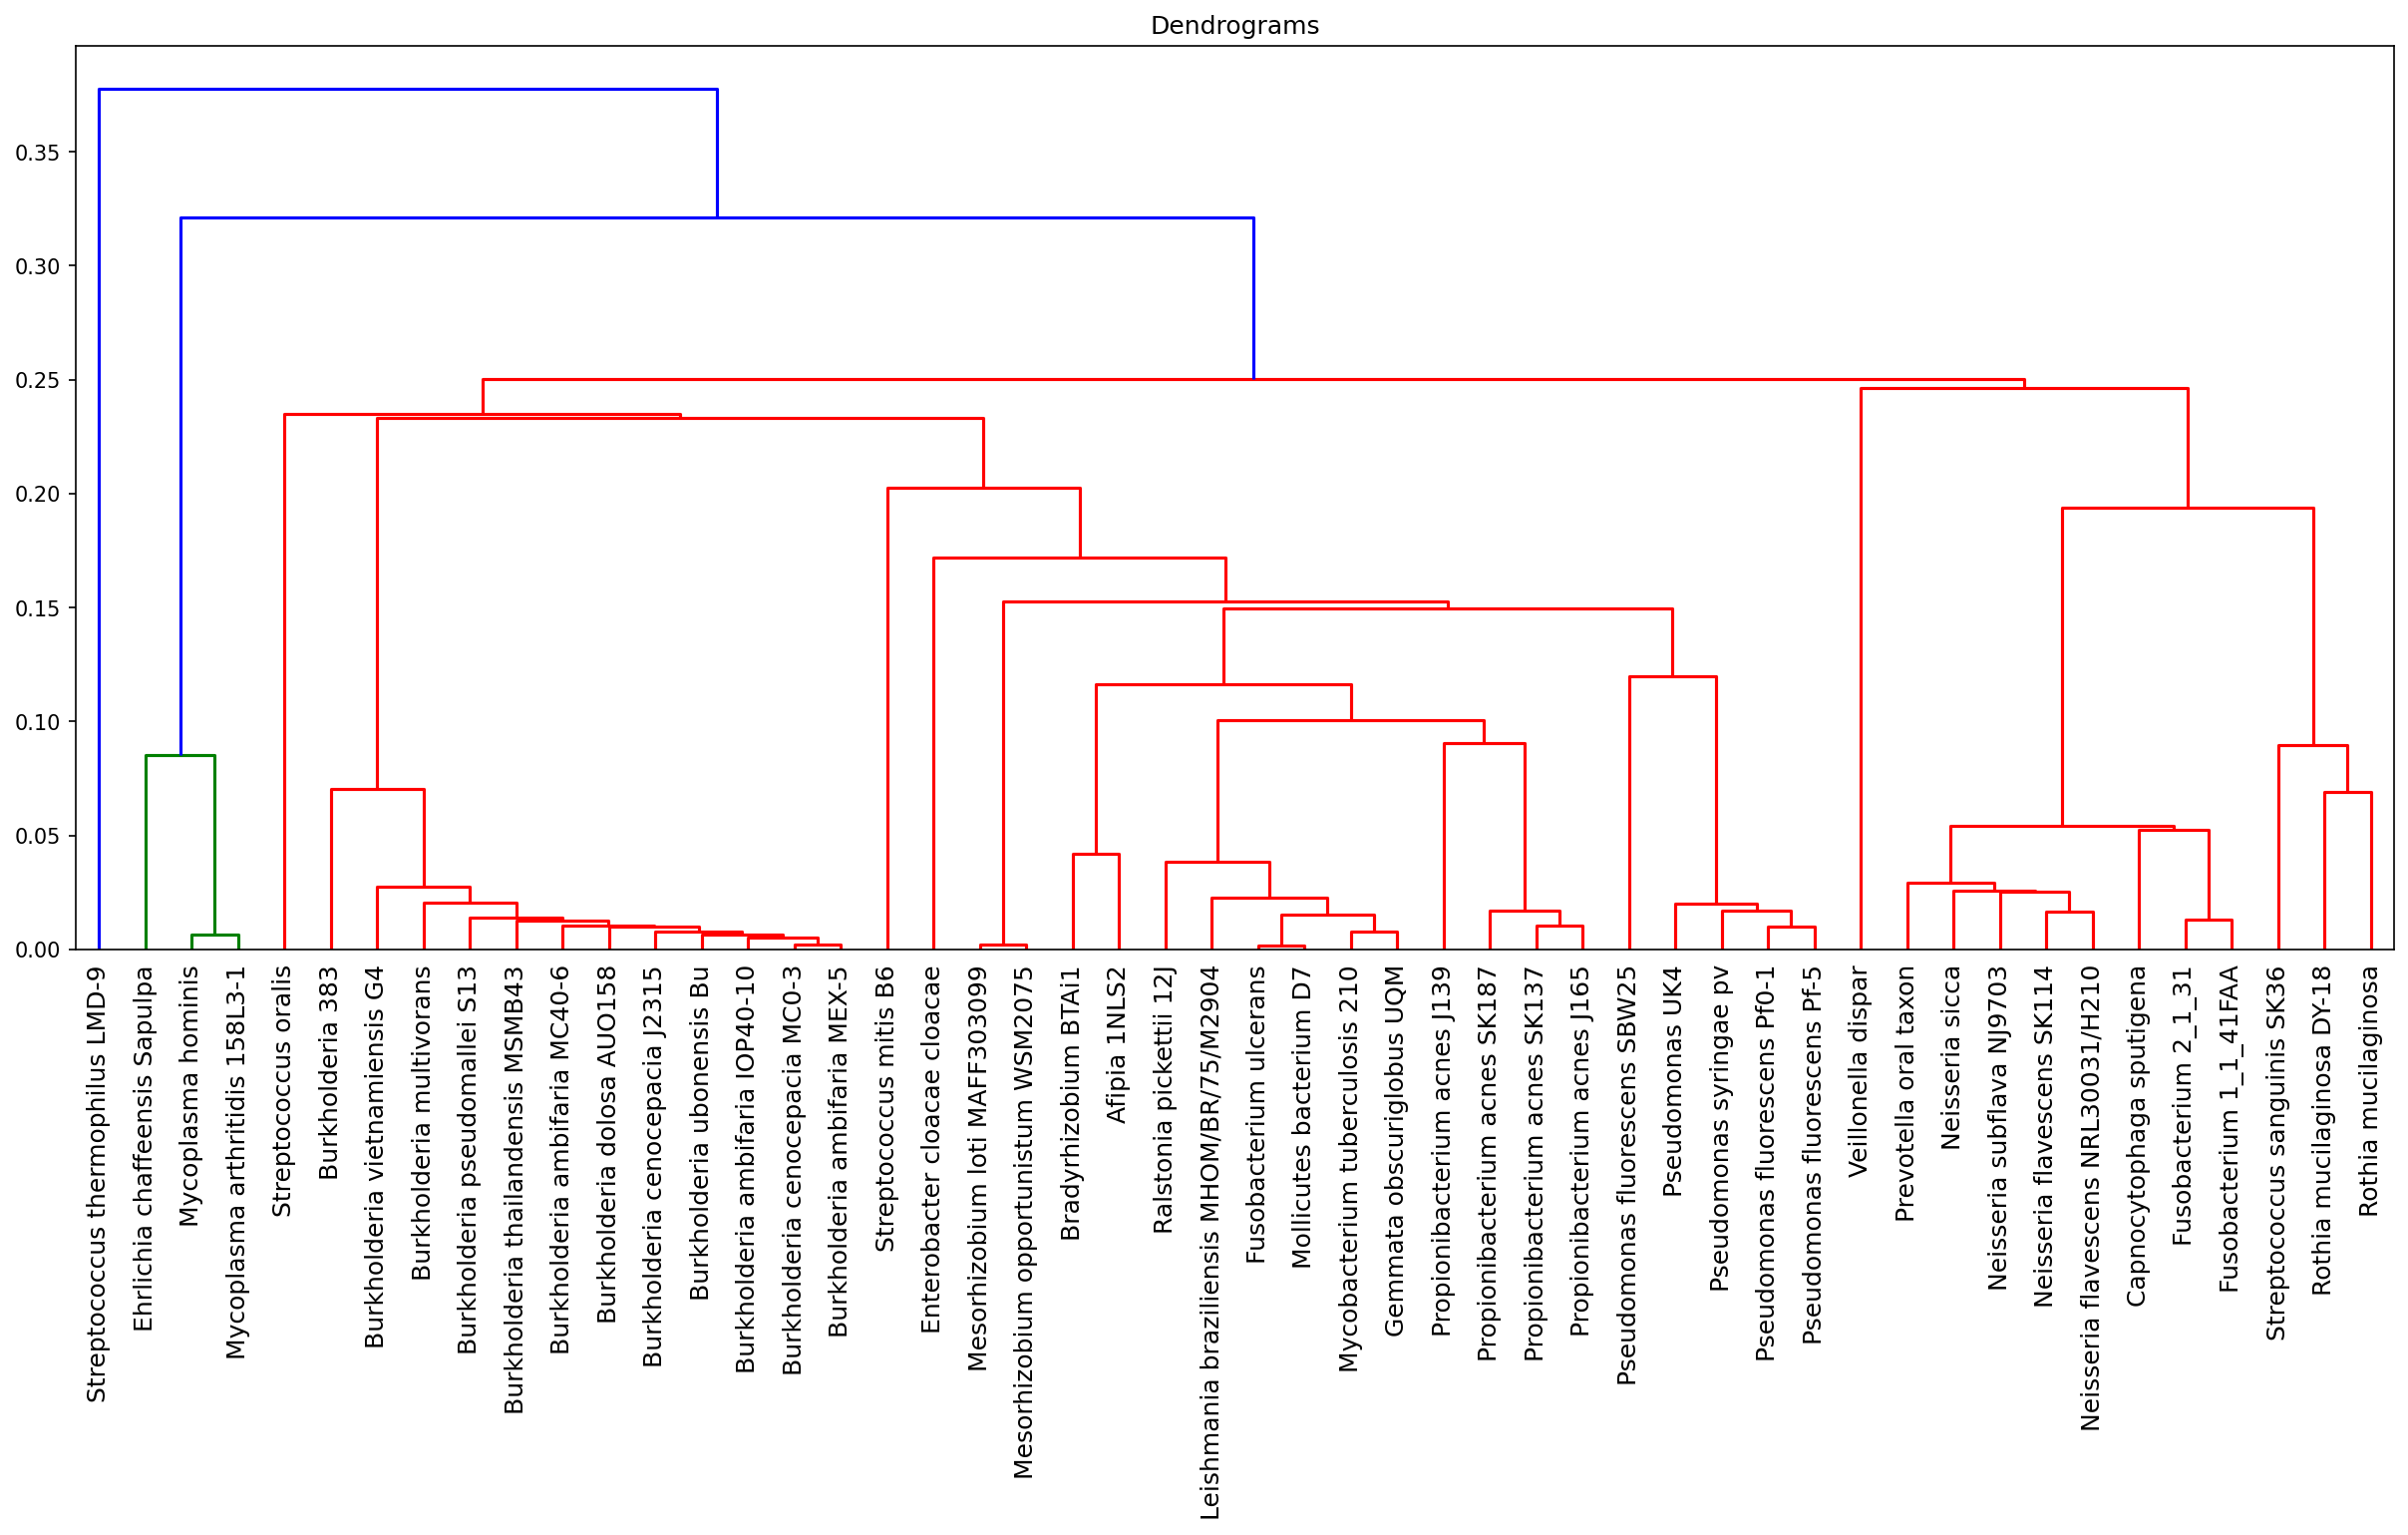

In [36]:
import scipy.cluster.hierarchy as shc
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(20, 8), dpi=150)
plt.title("Dendrograms")
cmap = plt.cm.rainbow(np.linspace(0, 1, 10))
# shc.set_link_color_palette([colors.rgb2hex(rgb[:3]) for rgb in cmap])
dend = shc.dendrogram(shc.linkage(df_scaled.iloc[:50, :].values), 
                      labels=df_scaled.iloc[:50, :].index)
ax.tick_params(axis='x', which='major', labelsize=12)

In [5]:
from sklearn.preprocessing import normalize
df_scaled = normalize(df_sorted.fillna(0.), norm='l1', axis=0)
# df_scaled = np.where(df_scaled > 0, df_scaled, np.nan)
df_scaled += np.nextafter(0, 1)
df_scaled = pd.DataFrame(df_scaled.T, index=df_sorted.columns, columns=df_sorted.index)
print(df_scaled.shape)

(2175, 4568)


In [6]:
df_scaled.head()

03C23190 - LCL - AU1157  \
Burkholderia 383                           4.523287e-06   
Pseudomonas fluorescens SBW25              5.127122e-07   
Fusobacterium ulcerans                     4.895831e-04   
Burkholderia cenocepacia J2315             5.419704e-06   
Mollicutes bacterium D7                    5.312198e-04   

                                03C23194 - WB - AU1157  \
Burkholderia 383                          3.809084e-06   
Pseudomonas fluorescens SBW25             5.127122e-07   
Fusobacterium ulcerans                    5.764334e-04   
Burkholderia cenocepacia J2315            7.390506e-06   
Mollicutes bacterium D7                   6.162637e-04   

                                03C23208 - WB - AU1157  \
Burkholderia 383                          4.047152e-06   
Pseudomonas fluorescens SBW25             5.127122e-07   
Fusobacterium ulcerans                    6.089828e-07   
Burkholderia cenocepacia J2315            4.434304e-06   
Mollicutes bacterium D7                   5.287204e-07   

                                03C23209 - WB - AU1157  \
Burkholderia 383                          3.094881e-06   
Pseudomonas fluorescens SBW25             5.127122e-07   
Fusobacterium ulcerans                    5.126698e-04   
Burkholderia cenocepacia J2315            4.927004e-06   
Mollicutes bacterium D7                   5.472929e-04   

                                03C23211 - WB - AU1157  \
Burkholderia 383                              0.000003   
Pseudomonas fluorescens SBW25                 0.000002   
Fusobacterium ulcerans                        0.000517   
Burkholderia cenocepacia J2315                0.000007   
Mollicutes bacterium D7                       0.000545   

                                03C23214 - LCL - AU1165  \
Burkholderia 383                           3.332948e-06   
Pseudomonas fluorescens SBW25              5.127122e-07   
Fusobacterium ulcerans                     5.371202e-04   
Burkholderia cenocepacia J2315             4.434304e-06   
Mollicutes bacterium D7                    5.697684e-04   

                                03C23221 - LCL - AU1165  \
Burkholderia 383                           2.142610e-06   
Pseudomonas fluorescens SBW25             4.940656e-324   
Fusobacterium ulcerans                     4.792981e-04   
Burkholderia cenocepacia J2315             4.927004e-07   
Mollicutes bacterium D7                    5.057195e-04   

                                03C23222 - LCL - AU1165  \
Burkholderia 383                           3.094881e-06   
Pseudomonas fluorescens SBW25              5.127122e-07   
Fusobacterium ulcerans                     5.555719e-04   
Burkholderia cenocepacia J2315             3.941603e-06   
Mollicutes bacterium D7                    5.848032e-04   

                                03C23225 - LCL - AU1165  \
Burkholderia 383                           4.761355e-07   
Pseudomonas fluorescens SBW25              4.716952e-05   
Fusobacterium ulcerans                     5.389888e-04   
Burkholderia cenocepacia J2315            4.940656e-324   
Mollicutes bacterium D7                    5.746999e-04   

                                03C23239 - LCL - AU1165  ...  \
Burkholderia 383                           7.856236e-06  ...   
Pseudomonas fluorescens SBW25             4.940656e-324  ...   
Fusobacterium ulcerans                     7.963621e-07  ...   
Burkholderia cenocepacia J2315             1.231751e-05  ...   
Mollicutes bacterium D7                    6.376689e-07  ...   

                                10C108279 - WB - AU3777  \
Burkholderia 383                           1.364128e-04   
Pseudomonas fluorescens SBW25             4.940656e-324   
Fusobacterium ulcerans                     2.992864e-07   
Burkholderia cenocepacia J2315             1.527371e-04   
Mollicutes bacterium D7                    1.474008e-07   

                                10C115945 - WB - AU2293  \
Burkholderia 383                           2.856813e-06   
Pse

help: https://stackoverflow.com/questions/36898008/seaborn-heatmap-with-logarithmic-scale-colorbar

/home/users/chloehe/.local/lib/python3.6/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


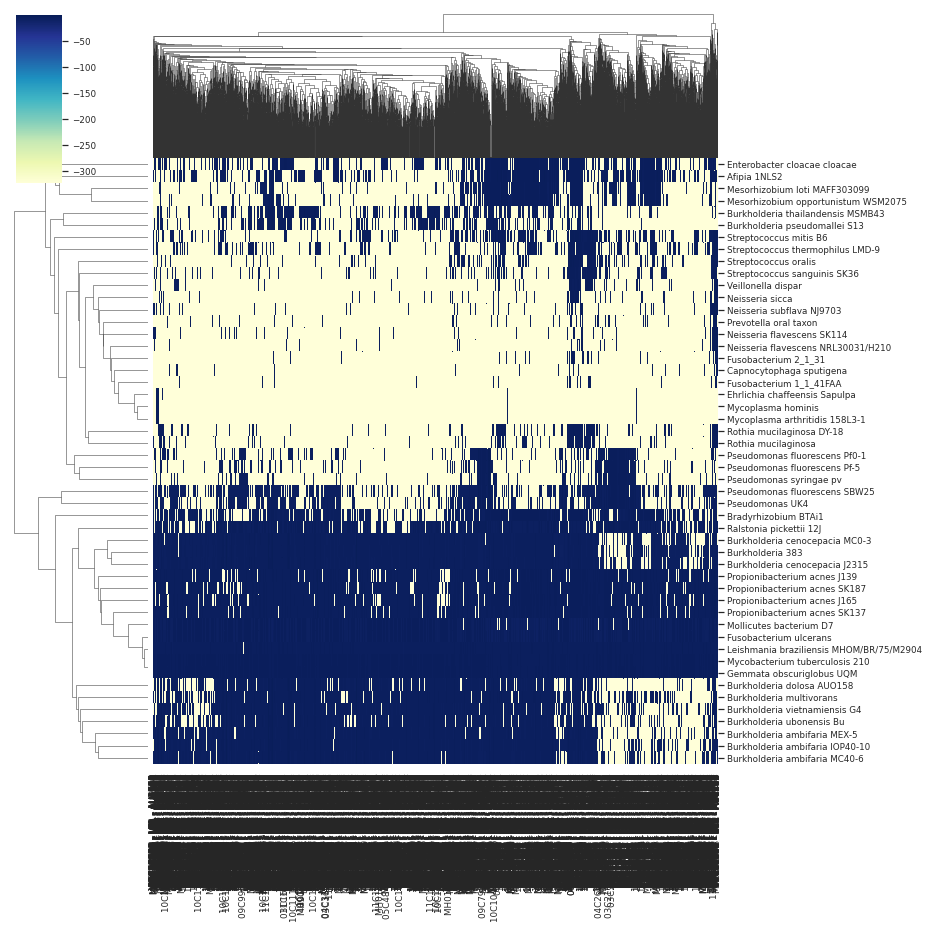

In [7]:
df_logscaled = np.log10(df_scaled)
sns.set(font_scale=0.8)
fg = sns.clustermap(df_logscaled.iloc[:50, :], cmap="YlGnBu", figsize=(13, 13), xticklabels=True)